In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import json
import re,math
import numpy as np

In [2]:
#source = requests.get('https://aoe2.net/api/leaderboard',
#                      params = {'game':'aoe2de','leaderboard_id':'3','count':'10','start':'1'}).text 
#leaderboard ids: 0 - unranked, 1 - 1v1 deathmatch, 2 - team deathmatch, 3 - 1v1 RM, 4 - team RM
url = 'https://aoe2.net/api/leaderboard?game=aoe2de&leaderboard_id=3&count=10&start=1'
urlTG = 'https://aoe2.net/api/leaderboard?game=aoe2de&leaderboard_id=4&count=10&start=1'
request = urllib.request.urlopen(url)
requestTG = urllib.request.urlopen(urlTG)
result = json.loads(request.read())
resultTG = json.loads(requestTG.read())
#print(source)
resultTG

{'total': 76297,
 'leaderboard_id': 4,
 'start': 1,
 'count': 10,
 'leaderboard': [{'profile_id': 212721,
   'rank': 1,
   'rating': 2232,
   'steam_id': '76561198116921964',
   'icon': None,
   'name': 'mYi.Sitaux',
   'clan': 'FrCo',
   'country': 'FR',
   'previous_rating': 2231,
   'highest_rating': 3615,
   'streak': 11,
   'lowest_streak': -6,
   'highest_streak': 35,
   'games': 3257,
   'wins': 2673,
   'losses': 584,
   'drops': 40,
   'last_match_time': 1677521773},
  {'profile_id': 286007,
   'rank': 2,
   'rating': 2222,
   'steam_id': '76561198400443434',
   'icon': None,
   'name': '曹水升不仅期末考试要挂而且考研也考不上',
   'clan': 'HPSS',
   'country': 'CN',
   'previous_rating': 3876,
   'highest_rating': 4055,
   'streak': 15,
   'lowest_streak': -5,
   'highest_streak': 43,
   'games': 527,
   'wins': 417,
   'losses': 110,
   'drops': 28,
   'last_match_time': 1678178515},
  {'profile_id': 208611,
   'rank': 3,
   'rating': 2100,
   'steam_id': '76561198325239137',
   'icon': None,
 

In [3]:
totalplayers = result['total']
totalplayersTG = resultTG['total']
print(f'1v1 RM total players: {totalplayers}')
print(f'TG RM total players: {totalplayersTG}')

1v1 RM total players: 46224
TG RM total players: 76297


In [4]:
df = pd.DataFrame.from_dict(result['leaderboard'])
df.drop(['profile_id','steam_id','last_match_time','icon'],axis = 1,inplace = True)
df.set_index('rank',inplace = True)
df

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2749,Hera,None,CA,2735,2809,4,-6,36,3486,2451,1035,27
2,2740,Villese,None,FI,2736,2740,10,-7,19,2784,1830,954,13
3,2699,Nicov,None,AR,2730,2730,-1,-5,22,1441,1049,392,8
4,2676,[aM]MbL40C,None,NO,2675,2751,2,-9,23,4113,2886,1227,96
5,2676,___MbL___,None,NO,2668,2676,15,-10,73,479,368,111,4
6,2663,SalzZ_Vinchester,None,RU,2687,2687,1,-6,18,1448,1000,448,7
7,2659,虚伪的动物世界,None,CN,2641,2659,4,-4,12,249,186,63,1
8,2652,Gamdom.ACCM | AOEBuilds.com,None,VN,2645,2668,6,-7,25,3259,2262,997,42
9,2643,_Barles_,None,PL,2634,2697,5,-7,12,2551,1610,941,12


In [5]:
dfTG = pd.DataFrame.from_dict(resultTG['leaderboard'])
dfTG.drop(['profile_id','steam_id','last_match_time','icon'],axis = 1,inplace = True)
dfTG.set_index('rank',inplace = True)
dfTG

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2232,mYi.Sitaux,FrCo,FR,2231,3615,11,-6,35,3257,2673,584,40
2,2222,曹水升不仅期末考试要挂而且考研也考不上,HPSS,CN,3876,4055,15,-5,43,527,417,110,28
3,2100,Villese,None,FI,2099,3128,13,-2,36,421,349,72,5
4,2095,Cl3m3nT,FrCo,FR,2094,3186,4,-4,29,609,488,121,8
5,2068,miguel,None,BR,2088,3240,-1,-3,17,604,483,121,5
6,2040,Lucky Rox,Biry,AR,2026,3313,1,-5,52,707,540,167,7
7,2039,Ganji,None,SE,2067,2082,5,-4,20,238,188,50,1
8,2022,HGB_AOE,None,MX,2016,4580,10,-8,18,1603,1053,550,13
9,2020,Nicov,None,AR,2016,3340,1,-5,35,1198,994,204,19


In [6]:
def leaderboard_read(count = 100, start = 1, leaderboard_id = 3): #0 = unranked, 1 = DM, 2 = TG DM, 3 = RM, 4 = TG RM, 13 = EW, 14 = EW TG 
    url = f'https://aoe2.net/api/leaderboard?game=aoe2de&leaderboard_id={leaderboard_id}&count={count}&start={start}'
    request = urllib.request.urlopen(url)
    result = json.loads(request.read())
    df = pd.DataFrame.from_dict(result['leaderboard'])
    df.drop(['profile_id','steam_id','last_match_time','icon'],axis = 1,inplace = True)
    df.set_index('rank',inplace = True)
    df = df.astype({'rating':np.int16,'streak':np.int8,'games':np.uint32,'wins':np.uint32,'losses':np.uint32,
                    'drops':np.uint8})
    return df
top100df = leaderboard_read()
top100dfTG = leaderboard_read(leaderboard_id = 4)
top100df

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2749,Hera,None,CA,2735,2809,4,-6,36,3486,2451,1035,27
2,2740,Villese,None,FI,2736,2740,10,-7,19,2784,1830,954,13
3,2699,Nicov,None,AR,2730,2730,-1,-5,22,1441,1049,392,8
4,2676,[aM]MbL40C,None,NO,2675,2751,2,-9,23,4113,2886,1227,96
5,2676,___MbL___,None,NO,2668,2676,15,-10,73,479,368,111,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2273,CL.TheBloodless,C1own,US,2283,2393,-2,-10,13,5042,2672,2370,198
97,2272,mentalist_,None,CA,2257,2396,1,-8,22,1108,587,521,9
98,2272,Umut,None,TR,2287,2340,-1,-9,16,4283,2315,1968,57


In [7]:
top100dfTG

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2232,mYi.Sitaux,FrCo,FR,2231,3615,11,-6,35,3257,2673,584,40
2,2222,曹水升不仅期末考试要挂而且考研也考不上,HPSS,CN,3876,4055,15,-5,43,527,417,110,28
3,2100,Villese,None,FI,2099,3128,13,-2,36,421,349,72,5
4,2095,Cl3m3nT,FrCo,FR,2094,3186,4,-4,29,609,488,121,8
5,2068,miguel,None,BR,2088,3240,-1,-3,17,604,483,121,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1867,ELEOS | ElNoniro,ELEOS,PL,1856,3652,1,-6,13,1307,878,429,14
97,1867,Zastosy,None,PL,1854,3269,2,-8,21,1359,888,471,12
98,1866,Kiwi,AUNZ,NZ,1860,2738,6,-4,24,626,479,147,16


In [8]:
top100df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rating           100 non-null    int16 
 1   name             100 non-null    object
 2   clan             30 non-null     object
 3   country          99 non-null     object
 4   previous_rating  100 non-null    int64 
 5   highest_rating   100 non-null    int64 
 6   streak           100 non-null    int8  
 7   lowest_streak    100 non-null    int64 
 8   highest_streak   100 non-null    int64 
 9   games            100 non-null    uint32
 10  wins             100 non-null    uint32
 11  losses           100 non-null    uint32
 12  drops            100 non-null    uint8 
dtypes: int16(1), int64(4), int8(1), object(3), uint32(3), uint8(1)
memory usage: 7.8+ KB


In [9]:
def df_merger(leaderboard,count,start,leaderboard_id = 3):
    df = leaderboard_read(count = count,start=start,leaderboard_id=leaderboard_id)

    df = pd.concat([leaderboard,df],axis = 0)
    df = df.astype({'rating':np.int16,'streak':np.int8,'games':np.uint32,'wins':np.uint32,'losses':np.uint32,
                    'drops':np.uint8})
    return df


In [10]:
leaderboard = pd.DataFrame(columns = top100df.columns)
leaderboard.index.name = 'rank'
start = 1

leaderboardTG = pd.DataFrame(columns = top100df.columns)
leaderboardTG.index.name = 'rank'

counts = []
for n in range(int(totalplayers/10000)):
    counts.append(10000)
counts.append(totalplayers%10000) #maximum count at once is 10000
for count in counts:
    print(start)
    leaderboard = df_merger(leaderboard,count,start)
    start += count
counts = []
for n in range(int(totalplayersTG/10000)):
    counts.append(10000)
counts.append(totalplayersTG%10000)
start = 1
for count in counts:
    print(start)
    leaderboardTG = df_merger(leaderboardTG,count,start, leaderboard_id = 4)
    start += count
    
#leaderboard = df_merger(leaderboard,500,3500)

1
10001
20001
30001
40001
1
10001
20001
30001
40001
50001
60001
70001


In [11]:
print(leaderboard.info())
print(leaderboardTG.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46224 entries, 1 to 46224
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           46224 non-null  int16  
 1   name             46224 non-null  object 
 2   clan             15330 non-null  object 
 3   country          20748 non-null  object 
 4   previous_rating  45457 non-null  float64
 5   highest_rating   46221 non-null  object 
 6   streak           46224 non-null  int8   
 7   lowest_streak    46221 non-null  object 
 8   highest_streak   46221 non-null  object 
 9   games            46224 non-null  uint32 
 10  wins             46224 non-null  uint32 
 11  losses           46224 non-null  uint32 
 12  drops            46224 non-null  uint8  
dtypes: float64(1), int16(1), int8(1), object(6), uint32(3), uint8(1)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76297 entries, 1 to 76297
Data columns (total 13 colum

In [12]:
leaderboard.head()

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2749,Hera,None,CA,2735.0,2809,4,-6,36,3486,2451,1035,27
2,2740,Villese,None,FI,2736.0,2740,10,-7,19,2784,1830,954,13
3,2699,Nicov,None,AR,2730.0,2730,-1,-5,22,1441,1049,392,8
4,2676,[aM]MbL40C,None,NO,2675.0,2751,2,-9,23,4113,2886,1227,96
5,2676,___MbL___,None,NO,2668.0,2676,15,-10,73,479,368,111,4


In [13]:
leaderboardTG.head()

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2232,mYi.Sitaux,FrCo,FR,2231.0,3615.0,11,-6.0,35.0,3257,2673,584,40
2,2222,曹水升不仅期末考试要挂而且考研也考不上,HPSS,CN,3876.0,4055.0,15,-5.0,43.0,527,417,110,28
3,2100,Villese,None,FI,2099.0,3128.0,13,-2.0,36.0,421,349,72,5
4,2095,Cl3m3nT,FrCo,FR,2094.0,3186.0,4,-4.0,29.0,609,488,121,8
5,2068,miguel,None,BR,2088.0,3240.0,-1,-3.0,17.0,604,483,121,5


In [14]:
import time
from datetime import datetime
import os
direc = f'{os.getcwd()}/{os.path.dirname(__name__)}/'
print(direc)
currenttime = time.time()
dt = datetime.fromtimestamp(currenttime)
dtstring = f'{dt.year:04d}_{dt.month:02d}_{dt.day:02d}'


def round2(pct):
    order = -int(math.floor(np.log10(pct)))
    if order <= -1:
        rounding = int(np.round(pct,order+1))
    else:
        rounding = np.round(pct,order+1)
    return rounding
def rating_pct(rating, leaderboard=leaderboard):
    return leaderboard[leaderboard['rating']>=rating]['rating'].count()*100/leaderboard['rating'].count()

highestRating = int(math.ceil(max(leaderboard['rating'])/100)*100)
print('1v1 RM ladder')
oneVoneString = ''
for n in range(500,highestRating,100):
    pct = rating_pct(n,leaderboard)
    
    pct = round2(pct)
    pctString = f'{n} Elo is top {pct}%'
    print(pctString)
    oneVoneString += pctString + '\n'
print()
oneVoneString += '\n'
for n in np.arange(0.1,1,0.1):
    p = int(len(leaderboard.index)*n)
    rating = leaderboard.iloc[p]['rating']
    pctString = f'{rating} Elo is top {int(n*100)}%'
    print(pctString)
    
    oneVoneString += pctString +'\n'

f = open(f'{direc}/1v1_rating_{dtstring}.txt','w')
f.write(oneVoneString)
f.close()
highestRatingTG = int(math.ceil(max(leaderboardTG['rating'])/100)*100)
TGstring = ''
print('\nTG RM ladder')
for n in range(500,highestRatingTG,100):
    pct = rating_pct(n, leaderboardTG)
    
    pct = round2(pct)
    pctString = f'{n} Elo is top {pct}%'
    print(pctString)
    TGstring += pctString + '\n'
    

TGstring += '\n'

print()
for n in np.arange(0.1,1,0.1):
    p = int(len(leaderboardTG.index)*n)
    rating = leaderboardTG.iloc[p]['rating']
    pctString = f'{rating} Elo is top {int(n*100)}%'
    print(pctString)
    TGstring += pctString + '\n'
    
f = open(f'{direc}TG_rating_{dtstring}.txt','w')
f.write(TGstring)
f.close()

C:\Users\Kenny\Documents\gitRepos\aoe2net_apiReader//
1v1 RM ladder
500 Elo is top 98%
600 Elo is top 95%
700 Elo is top 91%
800 Elo is top 82%
900 Elo is top 66%
1000 Elo is top 50%
1100 Elo is top 35%
1200 Elo is top 24%
1300 Elo is top 17%
1400 Elo is top 11%
1500 Elo is top 7.5%
1600 Elo is top 4.8%
1700 Elo is top 3.0%
1800 Elo is top 1.9%
1900 Elo is top 1.2%
2000 Elo is top 0.76%
2100 Elo is top 0.48%
2200 Elo is top 0.3%
2300 Elo is top 0.19%
2400 Elo is top 0.11%
2500 Elo is top 0.058%
2600 Elo is top 0.026%
2700 Elo is top 0.0043%

1430 Elo is top 10%
1251 Elo is top 20%
1138 Elo is top 30%
1060 Elo is top 40%
997 Elo is top 50%
936 Elo is top 60%
877 Elo is top 70%
812 Elo is top 80%
708 Elo is top 90%

TG RM ladder
500 Elo is top 100%
600 Elo is top 99%
700 Elo is top 96%
800 Elo is top 89%
900 Elo is top 74%
1000 Elo is top 54%
1100 Elo is top 37%
1200 Elo is top 23%
1300 Elo is top 13%
1400 Elo is top 6.9%
1500 Elo is top 3.2%
1600 Elo is top 1.4%
1700 Elo is top 0.58%
18

Text(0.5, 1.0, 'TG RM ladder')

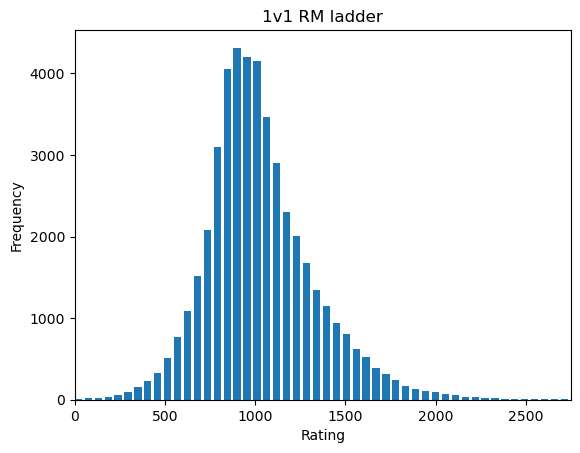

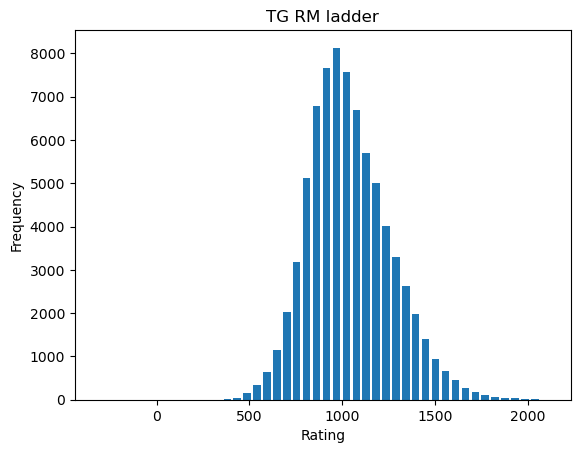

In [33]:
plt.figure(dpi = 100)
leaderboard['rating'].plot.hist(bins = 50,width = 40)
plt.xlabel('Rating')
plt.xlim(list(leaderboard['rating'])[-1],list(leaderboard['rating'])[0])
plt.title('1v1 RM ladder')

plt.figure(dpi = 100)
leaderboardTG['rating'].plot.hist(bins = 50,width = 40)
plt.xlabel('Rating')
plt.xlim(list(leaderboardTG['rating'])[-1],list(leaderboardTG['rating'])[0])
plt.title('TG RM ladder')

In [18]:
leaderboard.describe()

,rating,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
count,45746.000000,44519.000000,45738.000000,45746.000000,45738.000000,45738.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,1037.066541,1041.025697,1120.723512,0.032506,-6.556671,6.347392,430.118480,217.826936,212.291545,7.260285
std,300.998419,300.472288,297.361364,2.903892,3.384789,3.747938,648.161727,328.529901,320.080693,15.338297
min,0.000000,0.000000,234.000000,-75.000000,-75.000000,-18.000000,10.000000,0.000000,0.000000,0.000000
25%,847.000000,850.000000,918.000000,-2.000000,-8.000000,5.000000,55.000000,27.000000,28.000000,0.000000
50%,997.000000,1000.000000,1075.000000,1.000000,-6.000000,7.000000,189.000000,97.000000,92.000000,2.000000
75%,1193.000000,1197.000000,1280.000000,2.000000,-5.000000,8.000000,532.000000,271.000000,262.000000,7.000000
max,2710.000000,2735.000000,2809.000000,87.000000,27.000000,87.000000,14574.000000,7293.000000,7281.000000,250.000000


In [15]:
leaderboardTG.describe()

,rating,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
count,76297.000000,75124.000000,76278.000000,76297.000000,76278.000000,76278.000000,76297.000000,76297.000000,76297.000000,76297.000000
mean,1047.130280,1054.659044,1416.459766,-0.144226,-7.011366,6.881827,426.141159,213.161985,212.979173,9.551673
std,220.735108,227.123379,510.890867,2.613686,3.254759,3.928953,530.105796,264.446636,268.565757,15.045922
min,-441.000000,-440.000000,464.000000,-65.000000,-65.000000,-12.000000,10.000000,0.000000,0.000000,0.000000
25%,893.000000,897.000000,1021.000000,-2.000000,-9.000000,5.000000,71.000000,35.000000,36.000000,1.000000
50%,1023.000000,1028.000000,1285.000000,-1.000000,-7.000000,7.000000,240.000000,121.000000,118.000000,5.000000
75%,1183.000000,1191.000000,1709.000000,1.000000,-5.000000,9.000000,576.000000,290.000000,286.000000,12.000000
max,2232.000000,3876.000000,4580.000000,44.000000,11.000000,86.000000,9034.000000,5328.000000,3838.000000,254.000000


In [17]:
print('1v1')
print(leaderboard['rating'].median())
print(leaderboard['rating'].mean())

print('TG')
print(leaderboardTG['rating'].median())
print(leaderboardTG['rating'].mean())

1v1
997.0
1035.9070612668743
TG
1023.0
1047.130280351783


In [18]:
pd.options.display.max_rows = 100

In [19]:
leaderboard.iloc[:100]

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2749,Hera,None,CA,2735.0,2809,4,-6,36,3486,2451,1035,27
2,2740,Villese,None,FI,2736.0,2740,10,-7,19,2784,1830,954,13
3,2699,Nicov,None,AR,2730.0,2730,-1,-5,22,1441,1049,392,8
4,2676,[aM]MbL40C,None,NO,2675.0,2751,2,-9,23,4113,2886,1227,96
5,2676,___MbL___,None,NO,2668.0,2676,15,-10,73,479,368,111,4
6,2663,SalzZ_Vinchester,None,RU,2687.0,2687,1,-6,18,1448,1000,448,7
7,2659,虚伪的动物世界,None,CN,2641.0,2659,4,-4,12,249,186,63,1
8,2652,Gamdom.ACCM | AOEBuilds.com,None,VN,2645.0,2668,6,-7,25,3259,2262,997,42
9,2643,_Barles_,None,PL,2634.0,2697,5,-7,12,2551,1610,941,12


In [27]:
def countryLeaderboard(country, leaderboard = leaderboard, number = 100):
    #country as country code
    leaderboardCountry = leaderboard[leaderboard['country'] == country].iloc[:number]
    leaderboardCountry.insert(0,'rankGlobal',leaderboardCountry.index.values[:number])
    leaderboardCountry.index = np.arange(1,number+1,dtype = np.uint32)
    leaderboardCountry.index.name = f'rank{country}'
    
    return leaderboardCountry
    
leaderboardNO = countryLeaderboard('NO')
leaderboardNO

,rankGlobal,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rankNO,,,,,,,,,,,,,,
1,4,2676,[aM]MbL40C,None,NO,2675.0,2751,2,-9,23,4113,2886,1227,96
2,5,2676,___MbL___,None,NO,2668.0,2676,15,-10,73,479,368,111,4
3,13,2597,GL.TheViper,None,NO,2654.0,2742,2,-9,22,1569,1024,545,4
4,35,2464,__TheMbL__,None,NO,2477.0,2542,-2,-5,39,924,701,223,9
5,161,2160,Skillyourself,None,NO,2194.0,2328,4,-14,19,529,308,221,7
6,513,1916,Aksminator,VLNS,NO,1903.0,1916,3,-8,9,963,513,450,3
7,959,1778,Tor,None,NO,1795.0,1957,-1,-7,10,586,319,267,26
8,1063,1754,TrCL.Arzach_BepisPog,TrCL,NO,1771.0,1771,-1,-12,10,773,413,360,9
9,1132,1740,daMastah,XyZa,NO,1752.0,1764,2,-10,10,1781,910,871,12


In [28]:
leaderboardTG_NO = countryLeaderboard('NO',leaderboardTG)
leaderboardTG_NO

,rankGlobal,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rankNO,,,,,,,,,,,,,,
1,67,1901,RoR | Kellar,RoR,NO,1920.0,3226.0,1,-4.0,37.0,912,755,157,8
2,226,1777,[aM]MbL40C,None,NO,1764.0,2547.0,2,-4.0,32.0,358,282,76,5
3,304,1738,CL.buddy,C1own,NO,1758.0,2990.0,-1,-7.0,16.0,1467,880,587,24
4,1019,1604,[Druz] Adal,Druz,NO,1590.0,2659.0,1,-7.0,13.0,1378,773,605,19
5,1218,1585,Cong4ever,VLNS,NO,1608.0,2734.0,-1,-4.0,16.0,369,262,107,10
6,1234,1584,Tor,None,NO,1604.0,2774.0,-3,-6.0,12.0,689,428,261,90
7,1345,1575,Mystic,None,NO,1584.0,2731.0,-1,-7.0,11.0,1594,863,731,13
8,1491,1561,Gorgern,BADG,NO,1549.0,2067.0,1,-13.0,8.0,1015,526,489,9
9,1620,1550,knutan96,DAO,NO,1537.0,2799.0,3,-14.0,11.0,1007,523,484,5


In [31]:
leaderboardUK = countryLeaderboard('GB')
leaderboardUK

,rankGlobal,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rankGB,,,,,,,,,,,,,,
1,64,2345,_Hallis,None,GB,2332.0,2398,9,-8,13,3219,1698,1521,28
2,132,2209,[🥕]steak,Brits,GB,2202.0,2209,3,-7,7,1350,715,635,5
3,135,2203,Draconian,None,GB,2196.0,2339,1,-11,18,1529,800,729,23
4,215,2102,[🥕]darvoi,RoR,GB,2133.0,2148,2,-5,13,726,405,321,6
5,238,2076,DanMT,Brits,GB,2098.0,2100,-1,-10,14,3994,2031,1963,65
6,252,2070,Ted,TedB,GB,2080.0,2080,-1,-6,7,2008,1041,967,15
7,315,2015,[🥕]Capy,Brits,GB,1999.0,2019,2,-7,10,1253,659,594,8
8,465,1936,teaa,Brits,GB,1955.0,2100,-2,-8,7,1518,795,723,18
9,471,1935,Toady,None,GB,1913.0,2069,2,-9,11,748,408,340,2


In [32]:
leaderboard['country'].value_counts().head(20)

US    2654
DE    2452
AR    1785
FR    1383
ES     979
GB     955
MX     789
BR     690
CL     649
TR     648
AU     623
CA     553
TW     435
CO     430
CN     427
NL     406
CH     353
SE     303
BE     299
IT     293
Name: country, dtype: int64

In [33]:
import plotly.graph_objs as go  #for plotting world data
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [34]:
country_codes = pd.read_csv('countryCodes.txt',sep='\t')
country_codes.set_index('2let',inplace=True)

In [35]:
def two_to_three(two):
    try:
        return country_codes.loc[two]['3let']
    except:
        return two

In [42]:
leaderboard2 =leaderboard.copy()
leaderboard2['country'] = leaderboard2['country'].apply(two_to_three)


leaderboard2TG =leaderboardTG.copy()
leaderboard2TG['country'] = leaderboard2TG['country'].apply(two_to_three)
leaderboard2TG.head()

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2232,mYi.Sitaux,FrCo,FRA,2231.0,3615.0,11,-6.0,35.0,3257,2673,584,40
2,2222,曹水升不仅期末考试要挂而且考研也考不上,HPSS,CHN,3876.0,4055.0,15,-5.0,43.0,527,417,110,28
3,2100,Villese,None,FIN,2099.0,3128.0,13,-2.0,36.0,421,349,72,5
4,2095,Cl3m3nT,FrCo,FRA,2094.0,3186.0,4,-4.0,29.0,609,488,121,8
5,2068,miguel,None,BRA,2088.0,3240.0,-1,-3.0,17.0,604,483,121,5


In [43]:
leaderboard2['country'].value_counts().head(20)

USA    2654
DEU    2452
ARG    1785
FRA    1383
ESP     979
GBR     955
MEX     789
BRA     690
CHL     649
TUR     648
AUS     623
CAN     553
TWN     435
COL     430
CHN     427
NLD     406
CHE     353
SWE     303
BEL     299
ITA     293
Name: country, dtype: int64

In [44]:
leaderboard2TG['country'].value_counts().head(20)

DEU    4402
USA    4178
ARG    2693
FRA    2074
ESP    1492
GBR    1469
TUR    1335
MEX    1208
CHL    1119
CHN    1099
BRA    1083
AUS    1044
CAN     938
TWN     812
NLD     699
COL     639
CHE     637
SWE     565
ITA     512
BEL     441
Name: country, dtype: int64

In [45]:
#leaderboard2['country'].value_counts()
top100 = leaderboard2.iloc[:100]
top100

,rating,name,clan,country,previous_rating,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops
rank,,,,,,,,,,,,,
1,2749,Hera,None,CAN,2735.0,2809,4,-6,36,3486,2451,1035,27
2,2740,Villese,None,FIN,2736.0,2740,10,-7,19,2784,1830,954,13
3,2699,Nicov,None,ARG,2730.0,2730,-1,-5,22,1441,1049,392,8
4,2676,[aM]MbL40C,None,NOR,2675.0,2751,2,-9,23,4113,2886,1227,96
5,2676,___MbL___,None,NOR,2668.0,2676,15,-10,73,479,368,111,4
6,2663,SalzZ_Vinchester,None,RUS,2687.0,2687,1,-6,18,1448,1000,448,7
7,2659,虚伪的动物世界,None,CHN,2641.0,2659,4,-4,12,249,186,63,1
8,2652,Gamdom.ACCM | AOEBuilds.com,None,VNM,2645.0,2668,6,-7,25,3259,2262,997,42
9,2643,_Barles_,None,POL,2634.0,2697,5,-7,12,2551,1610,941,12


In [47]:

data = dict(type = 'choropleth',
            locations = leaderboard2['country'].value_counts().index,
            colorscale= 'viridis_r',
            z=list(leaderboard2['country'].value_counts()),
            colorbar = {'title':'number of players'})

layout = dict(title = 'AOE2 number of 1v1 ranked players',
        geo = dict(showframe = False,
        projection = {'type':'natural earth'}))


dataTG = dict(type = 'choropleth',
            locations = leaderboard2TG['country'].value_counts().index,
            colorscale= 'viridis_r',
            z=list(leaderboard2TG['country'].value_counts()),
            colorbar = {'title':'number of players'})

layoutTG = dict(title = 'AOE2 number of TG ranked players',
        geo = dict(showframe = False,
        projection = {'type':'natural earth'}))

In [48]:
#plt.figure(dpi = 150)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [49]:
choromap = go.Figure(data = [dataTG],layout = layoutTG)
iplot(choromap)